# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('base_final.csv') 

# Separando a variável resposta e as variáveis explicativas
y = df['mau']  # Variável resposta
X = df.drop(columns=['mau'])  # Variáveis explicativas

# Remover variáveis string, se houver
X = X.select_dtypes(exclude=['object'])

# Dividindo os dados em 70% para treinamento e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train, y_train: dados de treinamento
# X_val, y_val: dados de validação


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

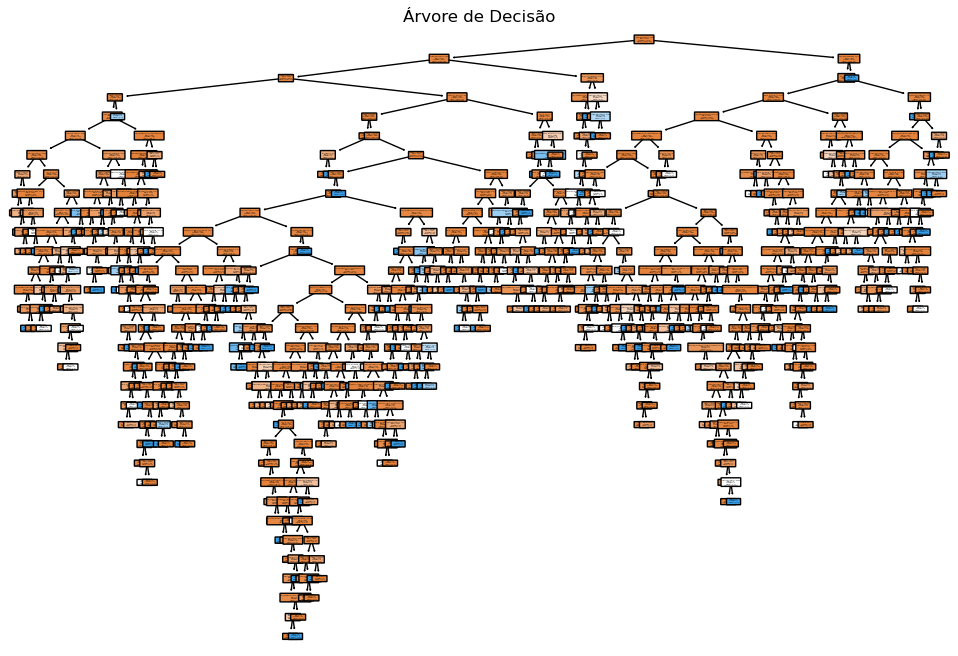

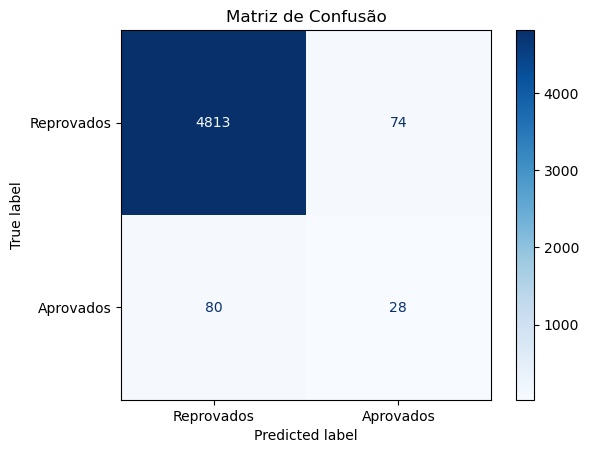

Acurácia no conjunto de treinamento: 0.99


In [11]:

# Definindo o modelo da árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Visualizando a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Reprovados", "Aprovados"], rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Prevendo os resultados no conjunto de validação
y_pred = model.predict(X_val)

# Criando a matriz de confusão
cm = confusion_matrix(y_val, y_pred, labels=[0, 1])  # 0: Reprovados, 1: Aprovados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reprovados", "Aprovados"])

# Visualizando a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

# Calculando a acurácia na base de treinamento
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Acurácia no conjunto de treinamento: {train_accuracy:.2f}")


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

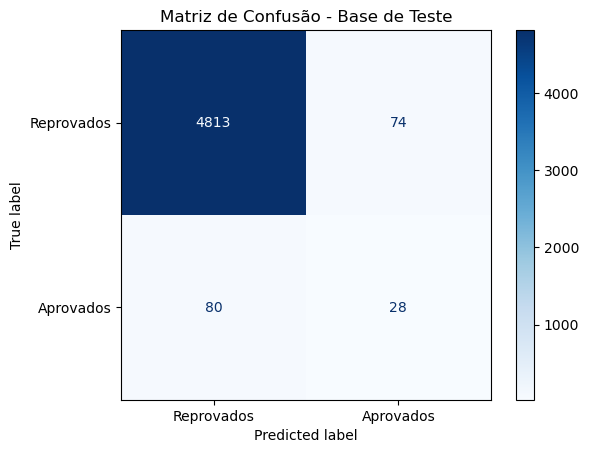

Acurácia na base de teste: 0.97
Acurácia na base de treinamento: 0.99


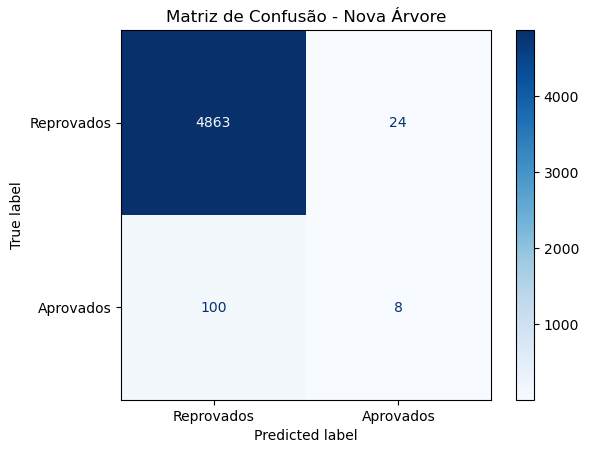

Proporção de proponentes classificados como 'maus': 0.64%
Acurácia se todos os contratos fossem classificados como 'bons': 97.84%


In [13]:
# Classificando a base de teste
y_test_pred = model.predict(X_val)  

# Produzindo a matriz de confusão para a base de teste
cm_test = confusion_matrix(y_val, y_test_pred, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Reprovados", "Aprovados"])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

# Calculando a acurácia da base de teste
test_accuracy = accuracy_score(y_val, y_test_pred)
print(f"Acurácia na base de teste: {test_accuracy:.2f}")

# Comparando com a acurácia da base de treinamento
print(f"Acurácia na base de treinamento: {train_accuracy:.2f}")

# Treinando uma nova árvore com parâmetros ajustados
new_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
new_model.fit(X_train, y_train)

# Avaliando a matriz de confusão para a nova árvore
y_new_pred = new_model.predict(X_val)
cm_new = confusion_matrix(y_val, y_new_pred, labels=[0, 1])
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=["Reprovados", "Aprovados"])
disp_new.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Nova Árvore")
plt.show()

# Proporção de proponentes classificados como 'maus' (mau = 1)
proporcao_maus = (y_new_pred == 1).sum() / len(y_new_pred)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2%}")

# Calculando a acurácia se todos os contratos fossem classificados como 'bons' (0)
# Acurácia se todos fossem 'bons' seria a proporção de 'bons' no conjunto de validação
acuracia_todos_bons = (y_val == 0).sum() / len(y_val)
print(f"Acurácia se todos os contratos fossem classificados como 'bons': {acuracia_todos_bons:.2%}")
